In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


(15, 15) (1, 1)


[((1, 1), (2, 2)),
 ((2, 2), (3, 2)),
 ((3, 2), (4, 2)),
 ((4, 2), (5, 2)),
 ((5, 2), (6, 2)),
 ((6, 2), (7, 2)),
 ((7, 2), (8, 2)),
 ((8, 2), (9, 2)),
 ((9, 2), (10, 2)),
 ((10, 2), (11, 2)),
 ((11, 2), (12, 2)),
 ((12, 2), (13, 2)),
 ((13, 2), (14, 2)),
 ((14, 2), (14, 3)),
 ((14, 3), (14, 4)),
 ((14, 4), (14, 5)),
 ((14, 5), (14, 6)),
 ((14, 6), (14, 7)),
 ((14, 7), (14, 8)),
 ((14, 8), (14, 9)),
 ((14, 9), (14, 10)),
 ((14, 10), (14, 11)),
 ((14, 11), (14, 12)),
 ((14, 12), (14, 13)),
 ((14, 13), (14, 14)),
 ((14, 14), (15, 15))]

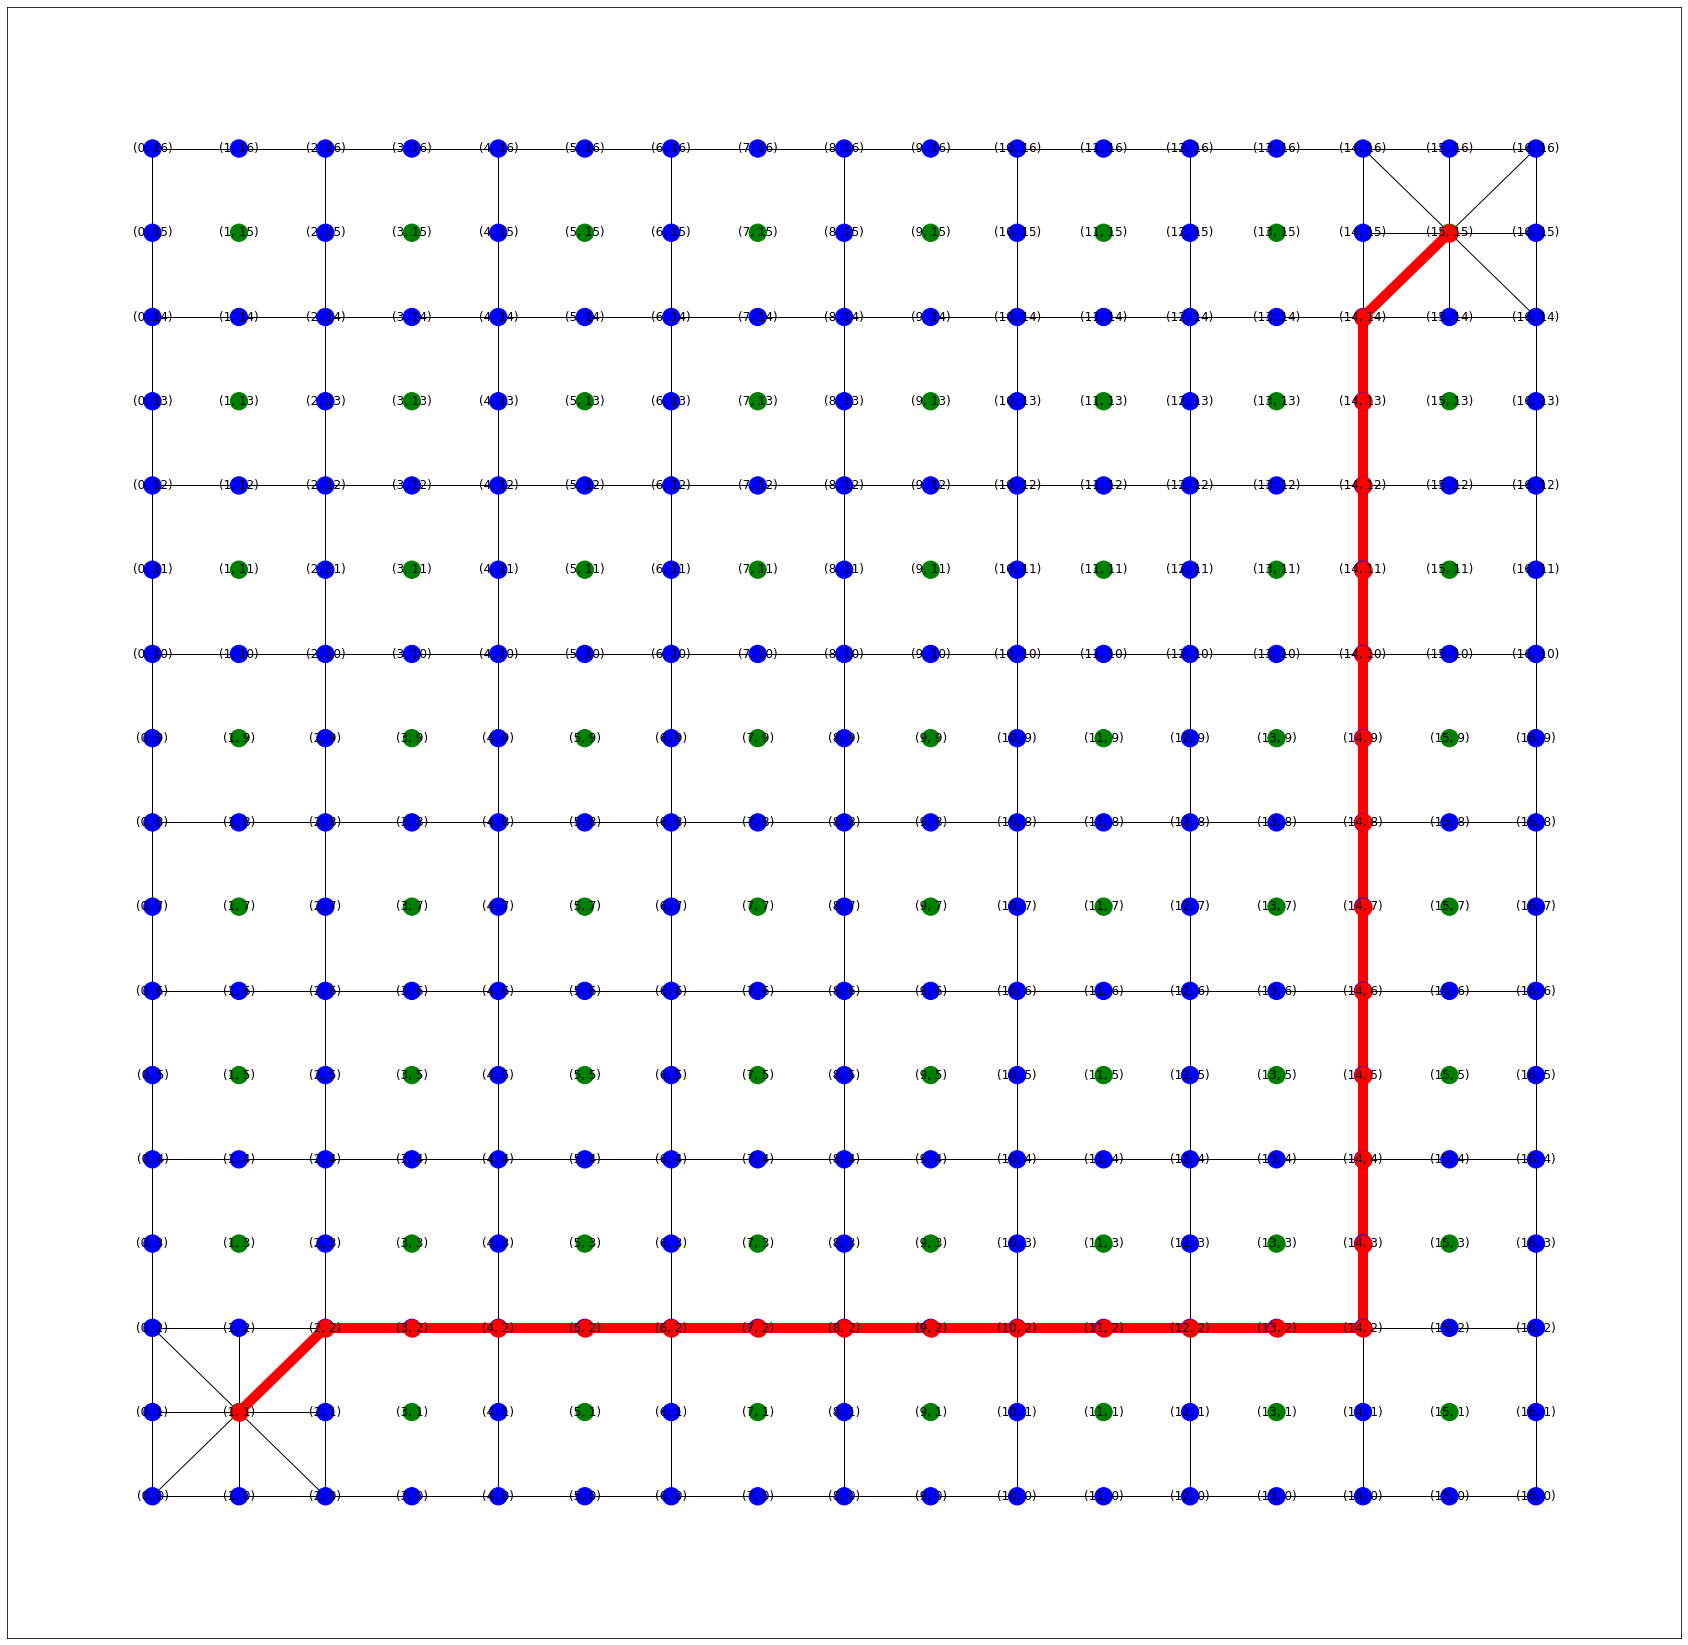

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

N=17
def get_id(coor):
    return coor[0]*N+coor[1]

def draw_graph(G):
    plt.rcParams["figure.figsize"] = (30,30)
    pos = dict( (n, n) for n in G.nodes() )
    #labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
    color_map =  [('green' if (i%2 == 1 and j % 2 == 1) else 'blue') for i,j in G.nodes()]
    #color_map[get_id(source)] = 'red'
    #color_map[get_id(sink)] = 'yellow'
    nx.draw_networkx(G, pos=pos, node_color = color_map)

    
def draw_shortest_path(G, path, path_edges):
    pos = dict( (n, n) for n in G.nodes() )
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
    
def remove_connecting_edges(G):
    for x in range(1,N, 2):
        for y in range(1,N,2):
            for i in range(-1,2):
                for j in range (-1,2):
                    u = (x,y)
                    v = (x+i,y+j)
                    if(x+i >=0 and y+j >=0 and G.has_edge(u,v)):
                        G.remove_edge(u,v)
def add_connecting_edges(G, u):
    for i in range(-1, 2):
        for j in range(-1,2):
            x = u[0]
            y = u[1]
            v= (x+i,y+j)
            if(x+i>=0 and y+j >=0 and x+i < N and y+j < N and u != v):
                G.add_edge(u,v)

def get_coordinates_from_move(move):
    source = (ord(move[0])-ord('a')+1, ord(move[1])-ord('0'))
    source = (source[0]*2 - 1,source[1]*2-1)
    sink = (ord(move[2])-ord('a')+1, ord(move[3])-ord('0'))
    sink = (sink[0]*2 - 1,sink[1]*2-1)
    print(sink, source)
    return (source, sink)

def get_path(move):
    G=nx.grid_2d_graph(N,N)

    (source,sink) = get_coordinates_from_move(move)
    
    H = G.copy()

    remove_connecting_edges(H)
    add_connecting_edges(H, source)
    add_connecting_edges(H, sink)

    path = nx.shortest_path(H,source=source, target=sink, method='dijkstra')
    path_edges = list(zip(path,path[1:]))

    draw_graph(H)
    draw_shortest_path(H,path,path_edges)
    return path_edges
    

get_path("a1h8")